In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading ACS data
usa_df_cleaning = pd.read_csv("../data/raw/usa_00005-002.csv")

#creating a copy for manipulation
usa_df_cleaning = usa_df.copy()

In [3]:
usa_df_cleaning.YEAR.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [4]:
usa_df_cleaning = usa_df_cleaning[["YEAR", "SAMPLE", "REGION", "STATEFIP", "COUNTYFIP", "HHINCOME", "SEX", "AGE", "MARST", 
                                   "RACE", "CITIZEN", "EDUC", "OCC2010", "CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC", "FAMSIZE"]]

In [5]:
#isolating years common to other data sets
usa_2011 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2011)]
usa_2012 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2012)]
usa_2013 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2013)]
usa_2015 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2015)]
usa_2017 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2017)]
usa_2018 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2018)]

In [6]:
#staging for concatenation
usa_years = [usa_2011, usa_2012, usa_2013, usa_2015, usa_2017, usa_2018]

In [7]:
#recombining dataframes
usa_df_cleaning = pd.concat(usa_years, axis=0)

In [8]:
usa_df_cleaning.isnull().sum()/len(usa_df_cleaning)*100

YEAR          0.000000
SAMPLE        0.000000
REGION        0.000000
STATEFIP      0.000000
COUNTYFIP     0.000000
HHINCOME      0.000000
SEX           0.000000
AGE           0.000000
MARST         0.000000
RACE          0.000000
CITIZEN       0.000000
EDUC          0.000000
OCC2010       0.000000
CINETHH      32.920338
CILAPTOP     32.920338
CISMRTPHN    66.130230
CITABLET     66.130230
CIHAND       66.790108
CIHISPEED    32.920338
CISAT        32.920338
CIDIAL       32.920338
CIOTHSVC     32.920338
FAMSIZE       0.000000
dtype: float64

<p>CISMRTPHN, CITABLET showing the same degree of missingness(75%)</p>
CINETHH, CILAPTOP, CIHISPEED, CISAT, CIDIAL, CIOTHSVC showing the same degree of missingness (25%).

In [9]:
#isolating and addressing columns with missing values
usa_df_missing = usa_df_cleaning[["CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC"]]

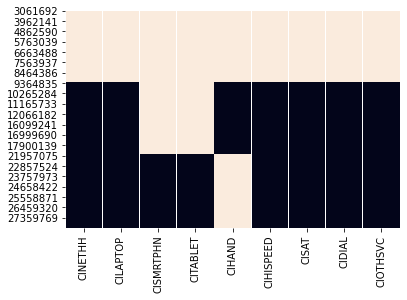

In [10]:
sns.heatmap(usa_df_missing.isnull(), cbar=False);

In [11]:
usa_df_missing.isnull().sum()/len(usa_df_missing)*100

CINETHH      32.920338
CILAPTOP     32.920338
CISMRTPHN    66.130230
CITABLET     66.130230
CIHAND       66.790108
CIHISPEED    32.920338
CISAT        32.920338
CIDIAL       32.920338
CIOTHSVC     32.920338
dtype: float64

It appears that the levels of missingness across variables may be uniform. Will confirm via manipulation and examination of indicies. 

In [12]:
usa_indicies = list(usa_df_missing.index)

In [13]:
usa_years = list(usa_df_cleaning.YEAR.unique())

In [14]:
usa_years

[2011, 2012, 2013, 2015, 2017, 2018]

In [15]:
for year in usa_years:
    #display(usa_df_cleaning[usa_df_cleaning.YEAR == year])
    print(f"----------------{year}----------------")
    print(usa_df_cleaning[usa_df_cleaning.YEAR == year].isnull().sum()/len(usa_df_cleaning[usa_df_cleaning.YEAR == year])*100, "\n")
    plt.show()

----------------2011----------------
YEAR           0.0
SAMPLE         0.0
REGION         0.0
STATEFIP       0.0
COUNTYFIP      0.0
HHINCOME       0.0
SEX            0.0
AGE            0.0
MARST          0.0
RACE           0.0
CITIZEN        0.0
EDUC           0.0
OCC2010        0.0
CINETHH      100.0
CILAPTOP     100.0
CISMRTPHN    100.0
CITABLET     100.0
CIHAND       100.0
CIHISPEED    100.0
CISAT        100.0
CIDIAL       100.0
CIOTHSVC     100.0
FAMSIZE        0.0
dtype: float64 

----------------2012----------------
YEAR           0.0
SAMPLE         0.0
REGION         0.0
STATEFIP       0.0
COUNTYFIP      0.0
HHINCOME       0.0
SEX            0.0
AGE            0.0
MARST          0.0
RACE           0.0
CITIZEN        0.0
EDUC           0.0
OCC2010        0.0
CINETHH      100.0
CILAPTOP     100.0
CISMRTPHN    100.0
CITABLET     100.0
CIHAND       100.0
CIHISPEED    100.0
CISAT        100.0
CIDIAL       100.0
CIOTHSVC     100.0
FAMSIZE        0.0
dtype: float64 

----------------20

#### Overall Missingness

In [16]:
usa_df_cleaning.shape

(18909426, 23)

In [17]:
usa_df_cleaning.to_csv("../data/processed/ACS_2011_2017_clean")